In [11]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from stable_baselines3 import PPO

In [3]:
BASE_PATH = '../../initial_model'

In [6]:
model = PPO.load(f'{BASE_PATH}/ppo/MlpPolicy/ppo_MlpPolicy')
# model = PPO.load('../output_models/ppo/MlpPolicy/2022-06-16_22_41_02_12.zip')
# model = PPO.load('../output_models/ppo/MlpPolicy/2022-06-09_13_09_03_12.zip')
X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([1447, 1, 7])

In [7]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

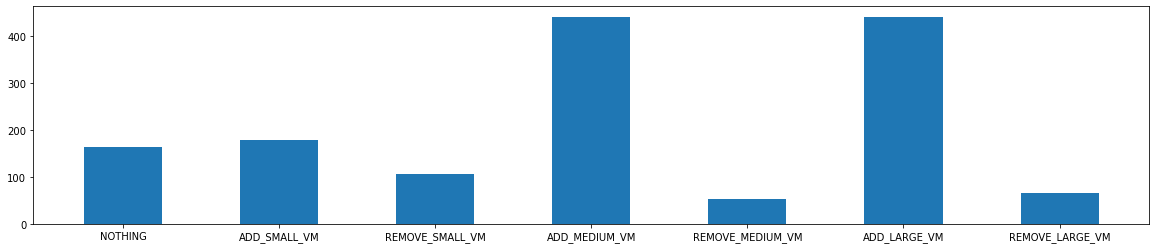

In [8]:
plot_action_histogram(predictions)

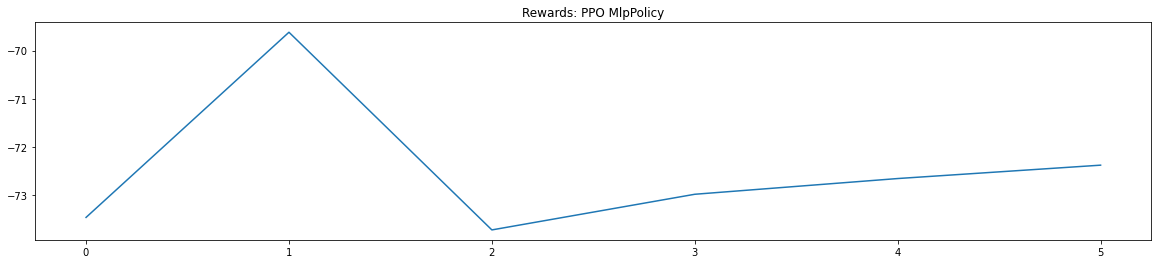

In [9]:
plot_training_data(f'{BASE_PATH}/ppo/MlpPolicy/training_data.csv', data_type='reward', title='PPO MlpPolicy')

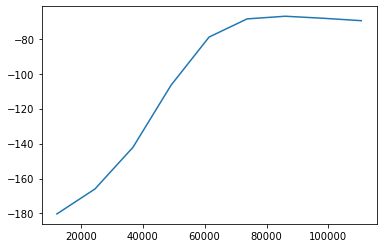

In [57]:
df = parse_tensorboard(path='../../output_models/ppo/MlpPolicy/PPO_130', scalars=['rollout/ep_rew_mean'])
# df = parse_tensorboard(path='../../output_models_initial/ppo/MlpPolicy/PPO_130', scalars=['rollout/ep_rew_mean'])
plt.plot(df['rollout/ep_rew_mean']['step'], df['rollout/ep_rew_mean']['value'])

In [14]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [15]:
x = torch.tensor(X[0])
ppo_net.forward(x)

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-16.7782]], grad_fn=<AddmmBackward0>)

In [31]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)

Action made: ADD_MEDIUM_VM


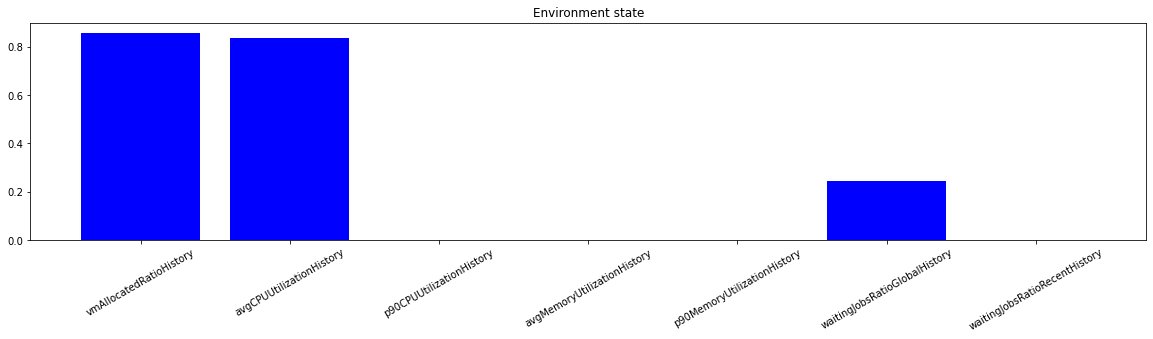

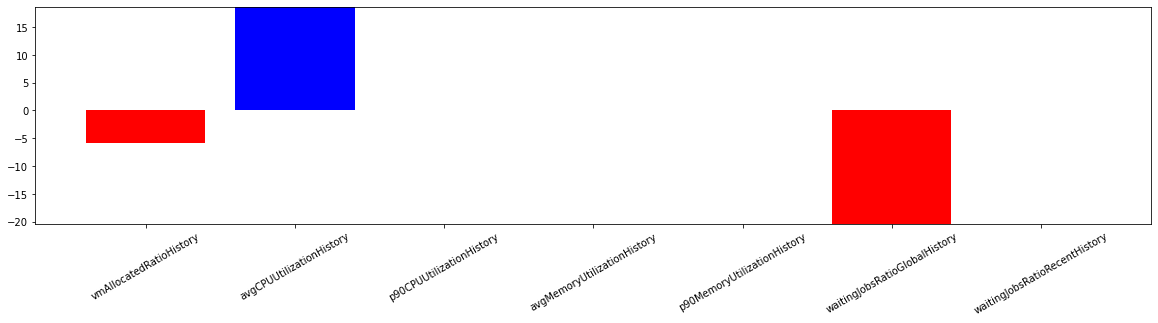

In [19]:
ig_attributor.explain_example(idx=10)

Action made: REMOVE_SMALL_VM


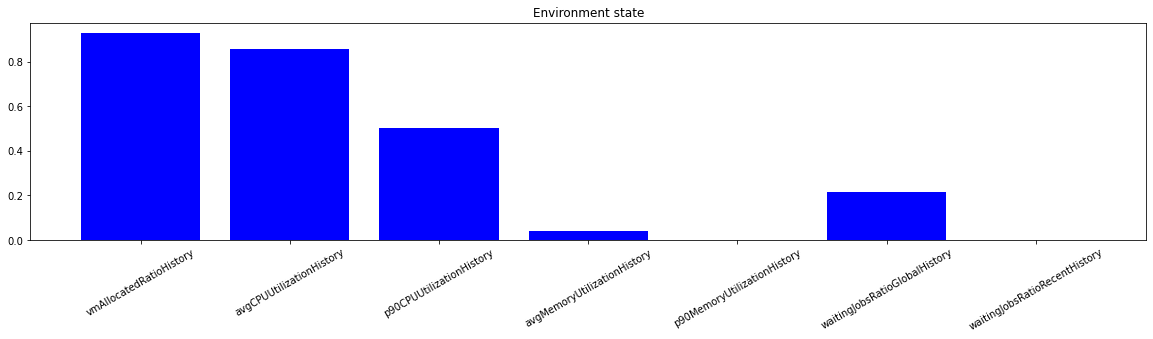

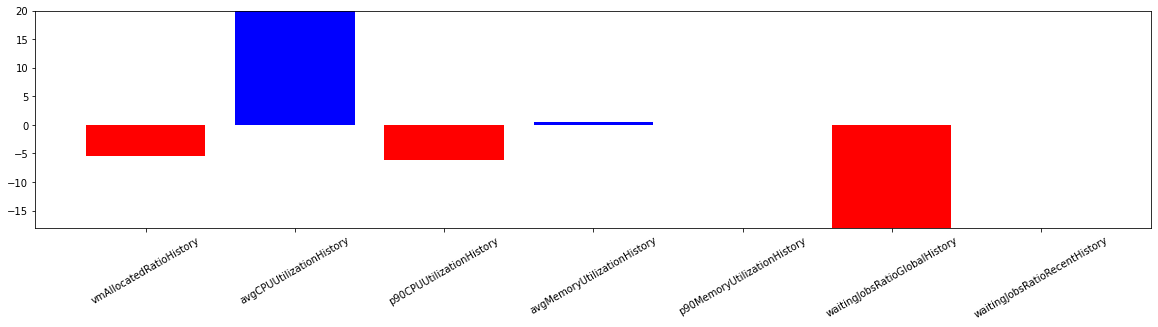

In [42]:
ig_attributor.explain_example(idx=490)

In [43]:
action_observation_map = get_action_observation_map(predictions)

Observation count for each action:
{'ADD_LARGE_VM': 441,
 'ADD_MEDIUM_VM': 440,
 'ADD_SMALL_VM': 178,
 'NOTHING': 163,
 'REMOVE_LARGE_VM': 66,
 'REMOVE_MEDIUM_VM': 52,
 'REMOVE_SMALL_VM': 107}


In [45]:
idx = action_observation_map['REMOVE_LARGE_VM'].squeeze(1)[:500]

In [46]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X[idx],
                            predictions=predictions[idx])

Action made: REMOVE_LARGE_VM


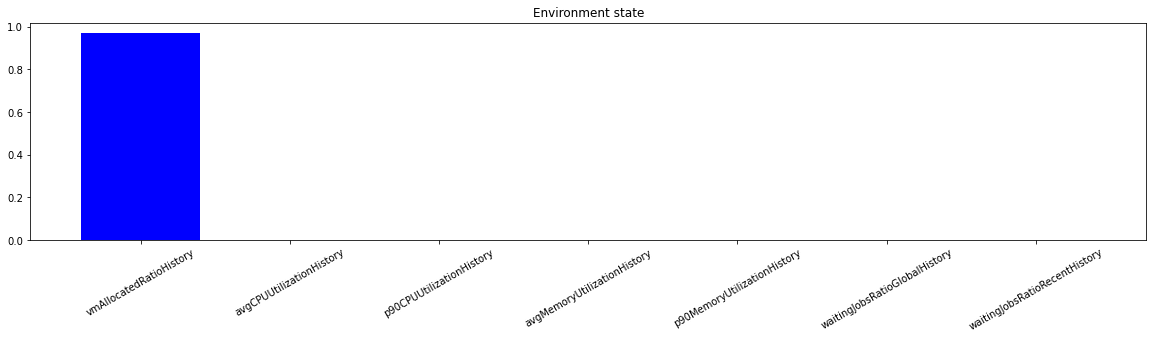

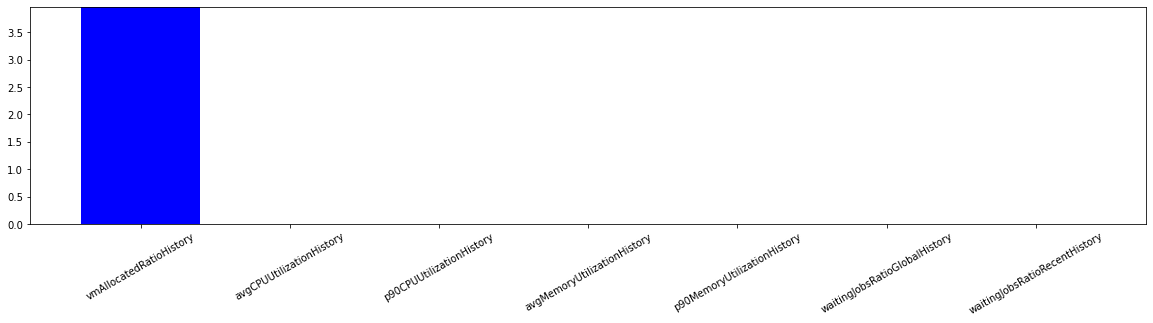

In [52]:
ig_attributor.explain_example(idx=60)

Action made: ADD_LARGE_VM


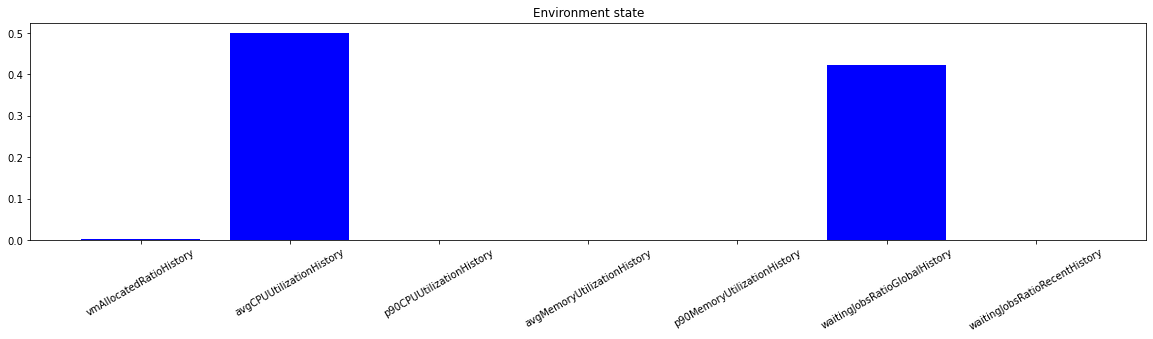

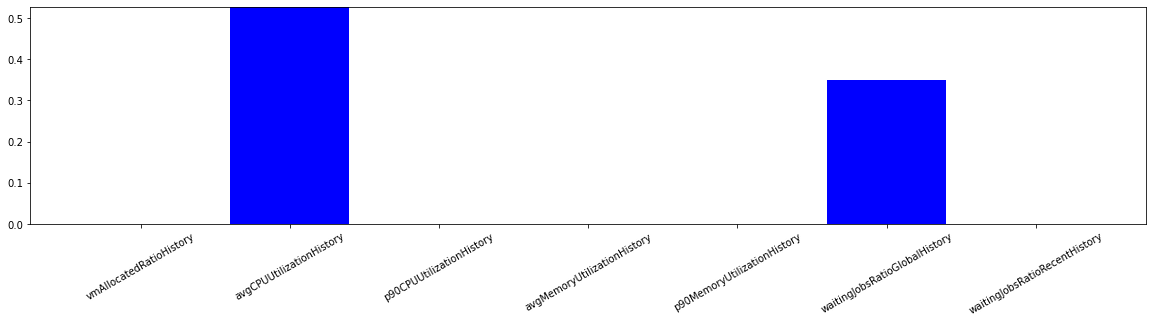

In [62]:
ig_attributor.explain_example(idx=10)

In [53]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0, 1, 1, 0, 0, 1, 1]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])
    
predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [54]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_manual,
                            predictions=predictions_manual)

Action made: REMOVE_MEDIUM_VM


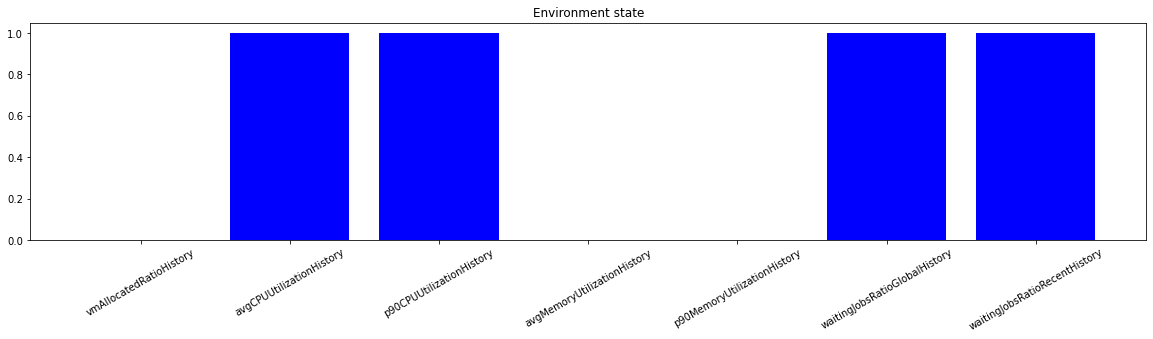

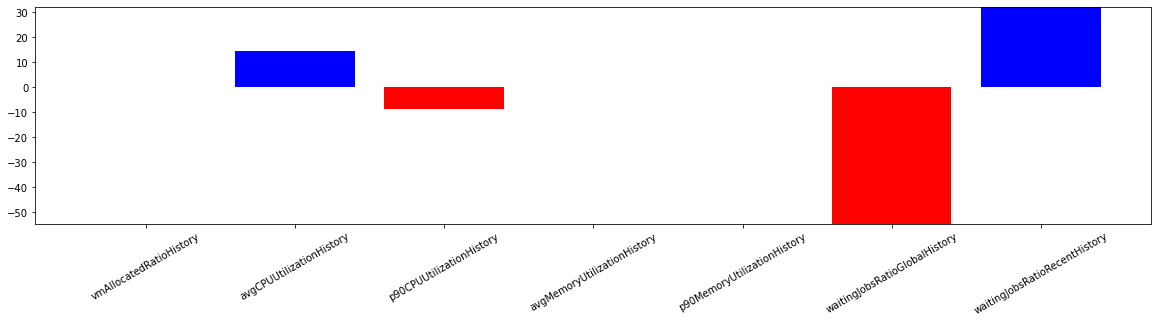

In [55]:
ig_attributor.explain_example(idx=2)

Action made: REMOVE_MEDIUM_VM


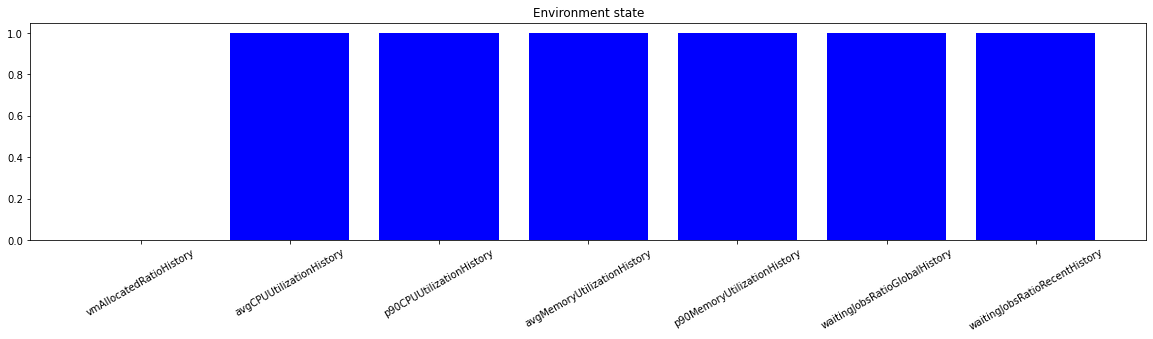

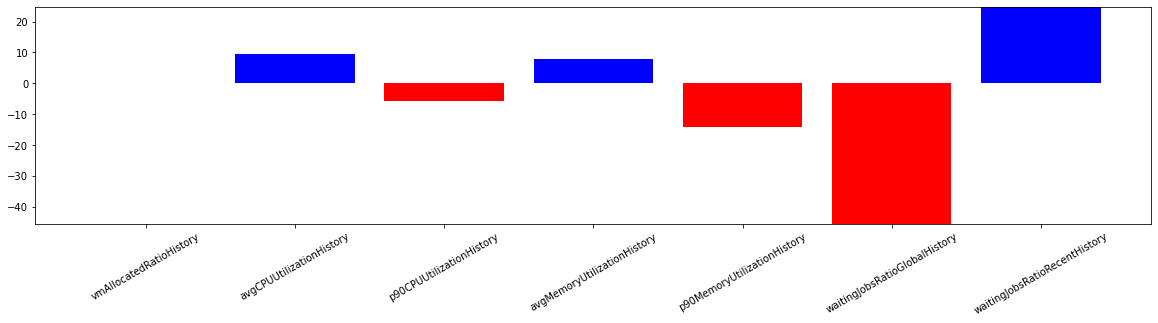

In [56]:
ig_attributor.explain_example(idx=0)